<a href="https://colab.research.google.com/github/Jacques-Wolbeck/Processamento-Digital-Imagens-UFAL/blob/main/atividades/fourier/fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


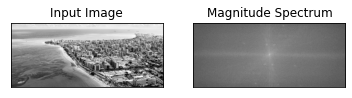

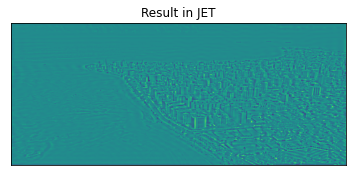

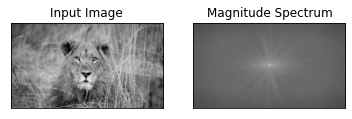

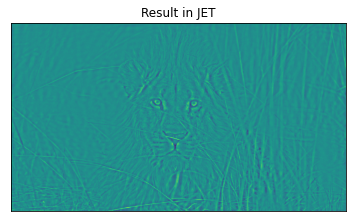

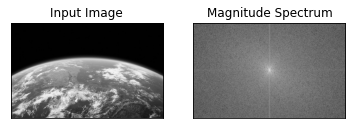

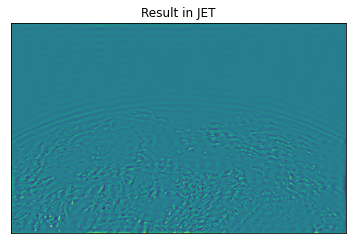

In [76]:
from google.colab import drive
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import cv2

drive.mount('/content/drive')

def fourierTransform(path):
  img = cv2.imread(path,0)
  f = np.fft.fft2(img)
  fshift = np.fft.fftshift(f)
  magnitude_spectrum = 20*np.log(np.abs(fshift))
  plt.subplot(121),plt.imshow(img, cmap = 'gray')
  plt.title('Input Image'), plt.xticks([]), plt.yticks([])
  plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
  plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
  plt.show()

  rows, cols = img.shape
  crow,ccol = rows//2 , cols//2
  fshift[crow-30:crow+31, ccol-30:ccol+31] = 0
  f_ishift = np.fft.ifftshift(fshift)
  img_back = np.fft.ifft2(f_ishift)
  img_back = np.real(img_back)
  #plt.subplot(121),plt.imshow(img_back, cmap = 'gray')
  #plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
  #plt.subplot(122),
  plt.imshow(img_back)
  plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
  plt.show()

fourierTransform('/content/drive/MyDrive/images/maceio.jpg')
fourierTransform('/content/drive/MyDrive/images/lion.jpg')
fourierTransform('/content/drive/MyDrive/images/earth.jpg')

In [82]:
import imutils

def detect_blur_fft(image, size=60, thresh=10, vis=False):
  (h, w) = image.shape
  (cX, cY) = (int(w / 2.0), int(h / 2.0))
 
  fft = np.fft.fft2(image)
  fftShift = np.fft.fftshift(fft)
  if vis:
		# compute the magnitude spectrum of the transform
    magnitude = 20 * np.log(np.abs(fftShift))
		# display the original input image
    (fig, ax) = plt.subplots(1, 2, )
    ax[0].imshow(image, cmap="gray")
    ax[0].set_title("Input")
    ax[0].set_xticks([])
    ax[0].set_yticks([])
		# display the magnitude image
    ax[1].imshow(magnitude, cmap="gray")
    ax[1].set_title("Magnitude Spectrum")
    ax[1].set_xticks([])
    ax[1].set_yticks([])

    plt.show()
  
  fftShift[cY - size:cY + size, cX - size:cX + size] = 0
  fftShift = np.fft.ifftshift(fftShift)
  recon = np.fft.ifft2(fftShift)
  magnitude = 20 * np.log(np.abs(recon))
  mean = np.mean(magnitude)
	# the image will be considered "blurry" if the mean value of the
	# magnitudes is less than the threshold value
  return (mean, mean <= thresh)

def readImage(path):
  orig = cv2.imread(path)
  orig = imutils.resize(orig, width=500)
  gray = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)

  return gray

def showBlur(mean, blurry, img_gray):
  image = np.dstack([img_gray] * 3)
  color = (0, 0, 255) if blurry else (0, 255, 0)
  text = "Blurry ({:.4f})" if blurry else "Not Blurry ({:.4f})"
  text = text.format(mean)
  cv2.putText(image, text, (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
    color, 2)
  print("[INFO] {}".format(text))
  # show the output image
  cv2_imshow(image)
  cv2.waitKey(0)

[INFO] Not Blurry (35.6433)


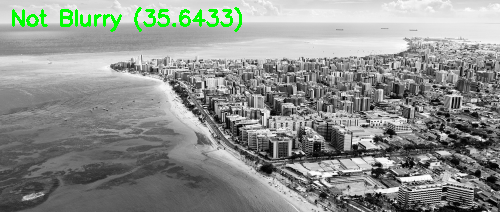

In [83]:
img1 = readImage('/content/drive/MyDrive/images/maceio.jpg')
# apply our blur detector using the FFT
(mean, blurry) = detect_blur_fft(img1)
showBlur(mean, blurry, img1)

[INFO] Not Blurry (28.4455)


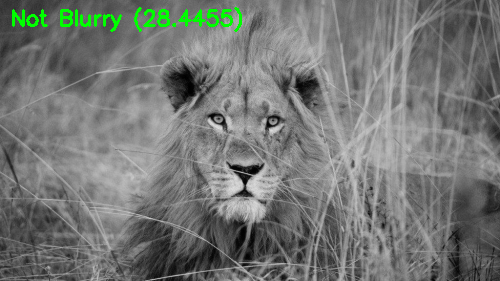

In [80]:
img2 = readImage('/content/drive/MyDrive/images/lion.jpg')
# apply our blur detector using the FFT
(mean, blurry) = detect_blur_fft(img2)
showBlur(mean, blurry, img2)

[INFO] Not Blurry (11.1651)


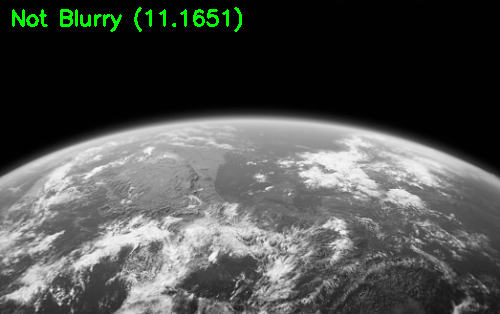

In [84]:
img2 = readImage('/content/drive/MyDrive/images/earth.jpg')
# apply our blur detector using the FFT
(mean, blurry) = detect_blur_fft(img3)
showBlur(mean, blurry, img3)